In [1]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

#PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

import jj_basic_fn as JJ
from hyperparams import Hyperparams as hp
from patient import patient
import prep
import plot_funcs
import modules

#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', -1)

import warnings
warnings.filterwarnings("ignore")
n_classifier = 7

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/hp/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [26]:
#plot_3d_var_list = ['beta2', 'beta4','low_gamma3']

import pickle
p231, p222_1, p222_2, p229 = \
pickle.load(open(hp.prepath_pat + '231' +'_trained.p', "rb" )),\
pickle.load(open(hp.prepath_pat + '222_1' +'_trained.p', "rb" )), \
pickle.load(open(hp.prepath_pat + '222_2' +'_trained.p', "rb" )), \
pickle.load(open(hp.prepath_pat + '229_trained_monthly.p', "rb" ))




In [27]:
pats = [p231, p222_1, p222_2]

## 1. Data loading

### What the data looks like

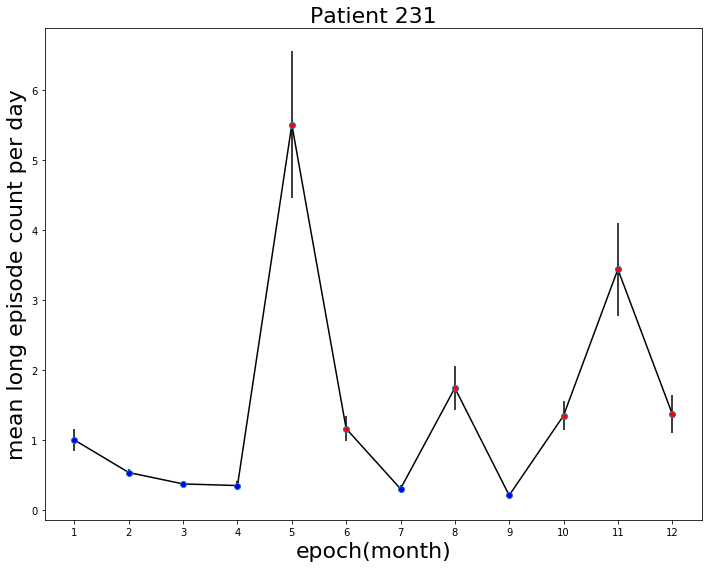

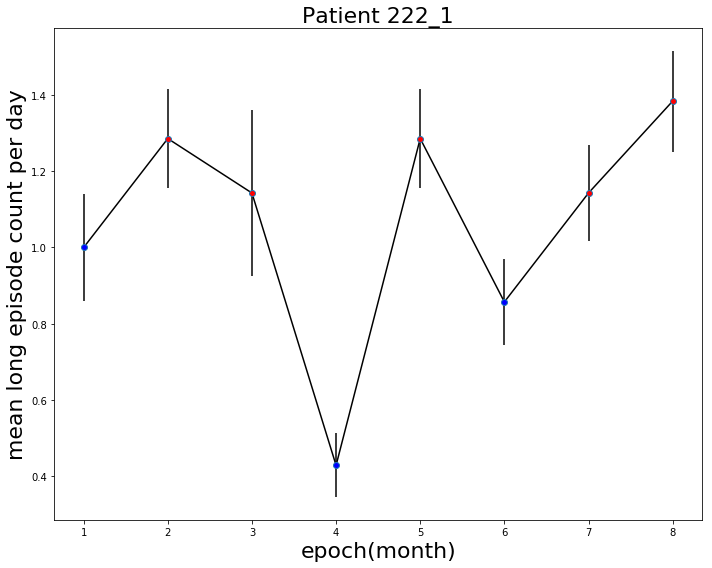

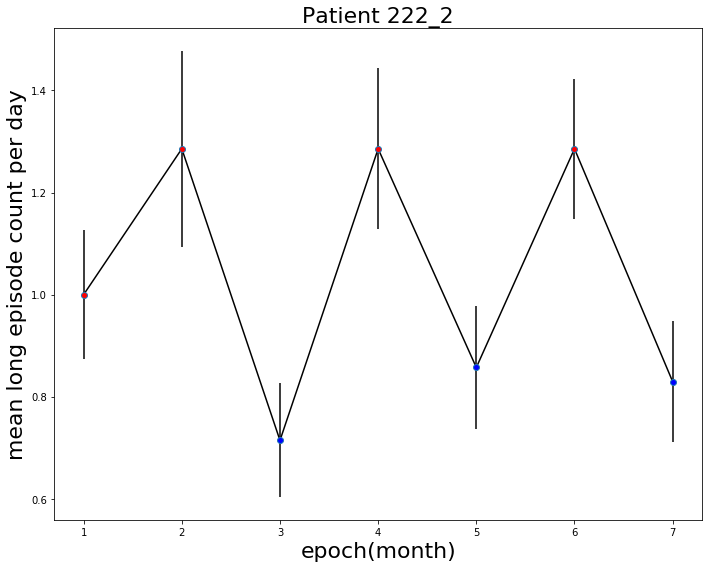

In [28]:
plot_funcs.plot_epoch_mean(pats, if_save = 0)


## 2. Building Classifiers
### Fitting 7 classfier to the training data and tune the hyperparameter using 10-fold cross-validation. Evaluate the performance of each classifier using test data

### 1:'Logistic Regression' (regulation type, regulation parameter)
### 2: 'SVM' (kernel type, degreee, regulation type, regulation parameter)
### 3: 'Gaussian Naive Bayes classifier'
### 4:'Linear Discriminant Analysis'
### 5:'Decision Tree' (criterion for splliting, max depth, min sample per leaf)
### 6:'Random Forest' (criterion for splliting, number of trees, number of features used in each  tree, max depth, min sample per leaf)
### 7:'Gradient Boosting' (number of estimator, number of samples used in each estimator, max depth, min sample per leaf, learning rate)

## 3. Classifier Performance

### Performace Overview of each Classifier

Total outliers removed: 24


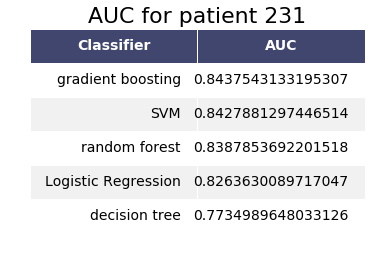

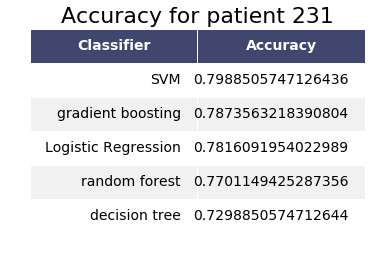

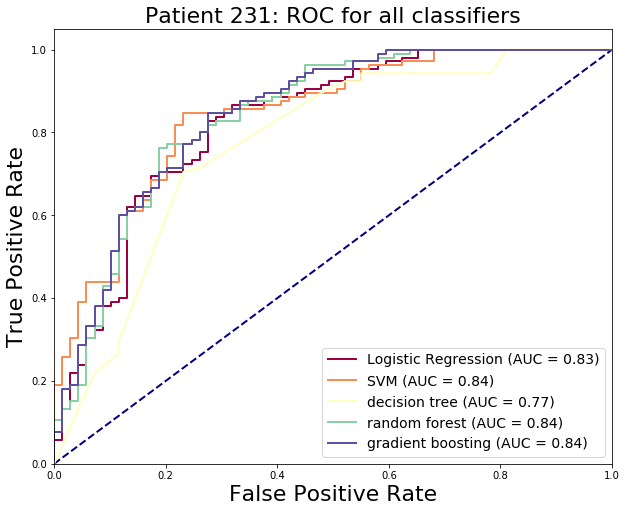

Total outliers removed: 19


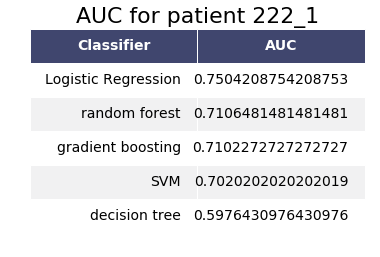

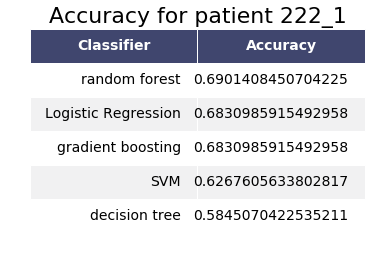

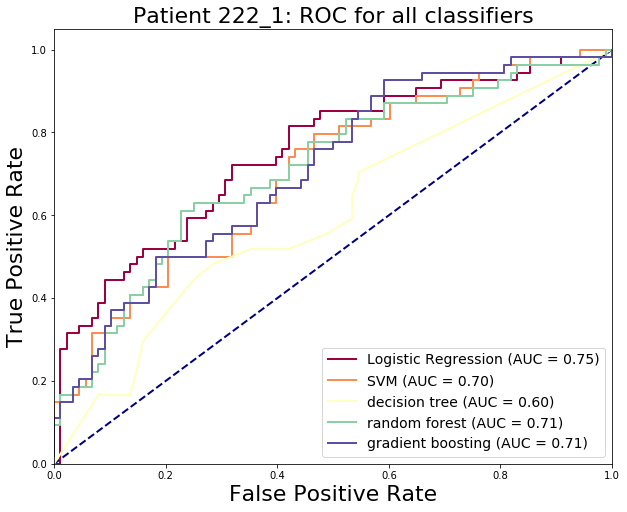

Total outliers removed: 15


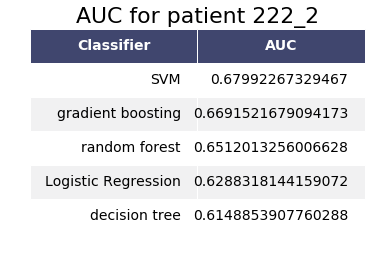

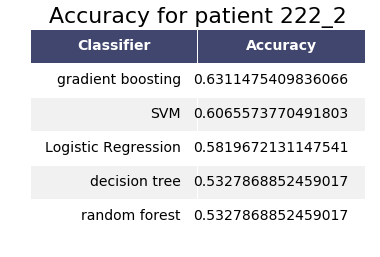

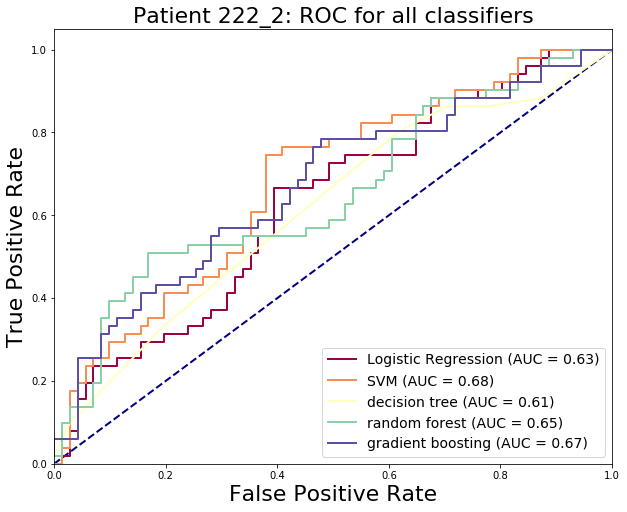

In [29]:
for pat in pats:
    X_train, X_test, y_train, y_test = modules.get_ml_data(pat, if_scaler = 1, if_remove_icd = 1, if_remove_sleep = 1)
    JJ.scores_estimators(X_test, y_test, pat= pat, if_save = 0)
    plot_funcs.plot_roc_all(X_test, y_test, pat =pat, if_save = 0)

### The confusion matrix and ROC of Gradient Boosting (the best classifier in this case)

[[0.12458206 0.         0.         0.        ]
 [0.15433758 0.90819568 0.03365332 0.07764482]
 [0.         0.16946144 0.18508172 0.19020733]
 [0.25603377 0.06331676 0.1141563  0.        ]
 [0.         0.         1.0782695  0.915265  ]
 [0.         0.         0.69891182 0.        ]]


<Figure size 720x576 with 0 Axes>

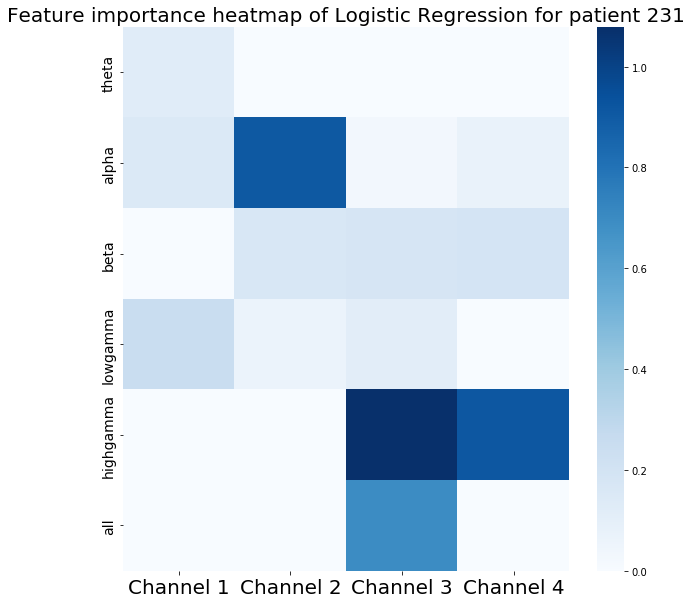

The 3 most important features for Logistic Regression are, theta Channel 2 , lowgamma Channel 4 , lowgamma Channel 3 
[[0.02969455 0.01844321 0.0301795  0.02836072]
 [0.02385413 0.042652   0.03865738 0.02585328]
 [0.02111504 0.04636912 0.04725159 0.04438796]
 [0.0310626  0.02712311 0.05302489 0.05200234]
 [0.0479966  0.04738191 0.12781182 0.09963001]
 [0.02614355 0.02200227 0.04774089 0.02126151]]


<Figure size 720x576 with 0 Axes>

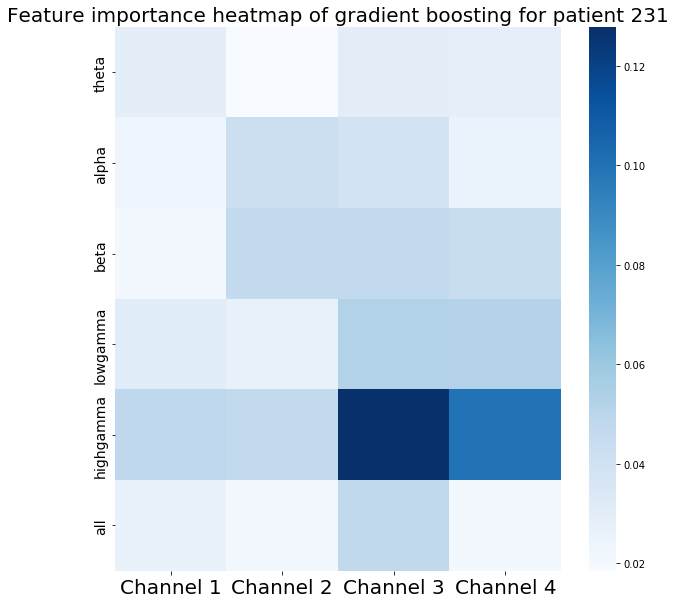

The 3 most important features for gradient boosting are, beta Channel 3 , lowgamma Channel 4 , lowgamma Channel 3 
[[0.         0.27568133 0.15921376 0.        ]
 [0.         0.         0.         0.11592889]
 [0.01513772 0.         0.26529885 0.66475827]
 [0.07689482 0.36694949 0.14260904 0.02825959]
 [0.         0.1856552  0.03306439 0.1189993 ]
 [0.         0.56121576 0.         0.        ]]


<Figure size 720x576 with 0 Axes>

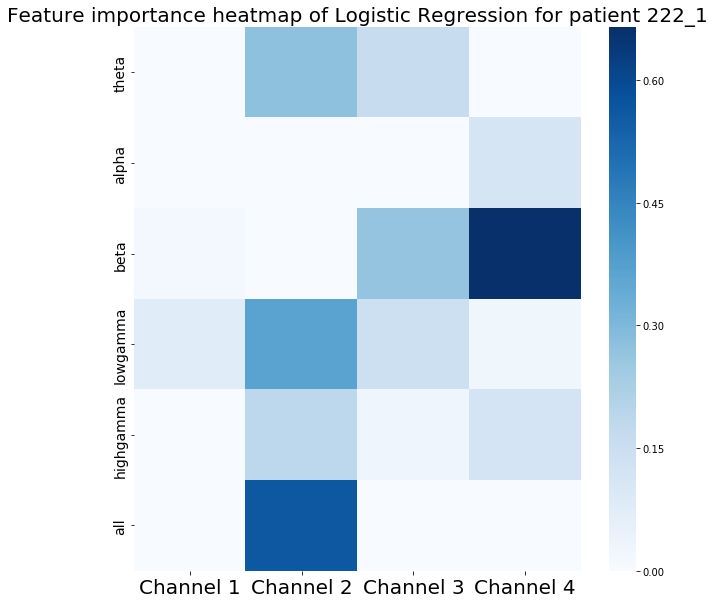

The 3 most important features for Logistic Regression are, beta Channel 2 , highgamma Channel 2 , alpha Channel 4 
[[0.0395 0.03   0.0235 0.0335]
 [0.0395 0.0335 0.0325 0.03  ]
 [0.0465 0.0435 0.0655 0.078 ]
 [0.0375 0.05   0.0465 0.0305]
 [0.0355 0.0405 0.0345 0.05  ]
 [0.0505 0.058  0.037  0.034 ]]


<Figure size 720x576 with 0 Axes>

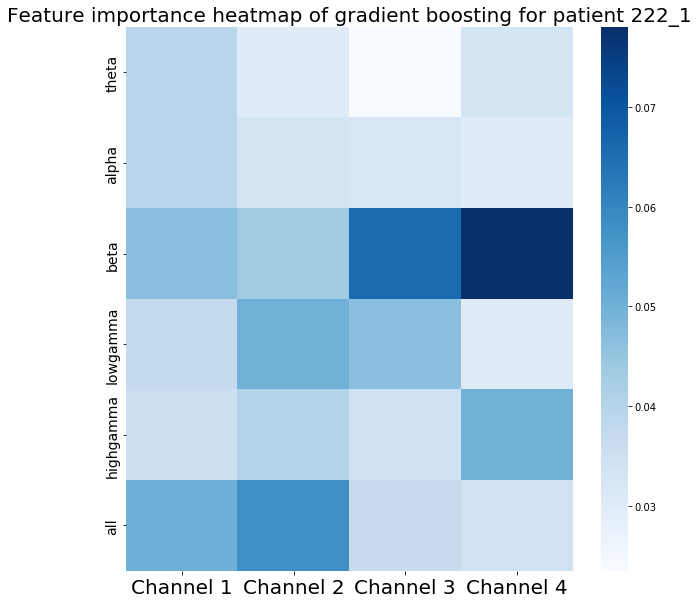

The 3 most important features for gradient boosting are, highgamma Channel 2 , alpha Channel 3 , alpha Channel 4 
[[0.5056687  0.04689152 0.95008257 0.24378203]
 [0.95184837 0.303933   0.0747745  0.12605284]
 [0.03830414 0.35815901 0.96154466 0.28968638]
 [0.17545988 0.82839237 0.17850264 0.88552148]
 [0.18914384 0.37660466 0.08512091 0.4808204 ]
 [1.61629937 0.61197828 1.78170762 0.20516802]]


<Figure size 720x576 with 0 Axes>

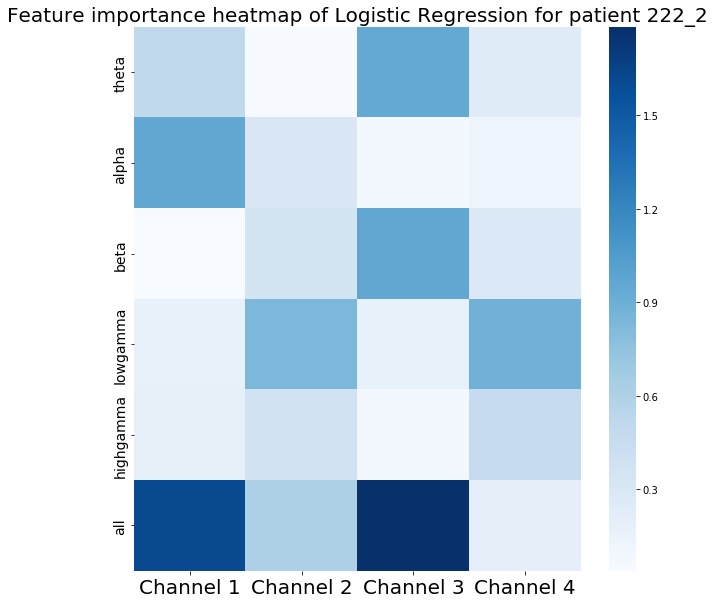

The 3 most important features for Logistic Regression are, alpha Channel 3 , highgamma Channel 1 , highgamma Channel 3 
[[0.04556356 0.05807746 0.0147059  0.03204643]
 [0.04027431 0.03681751 0.0533335  0.03561647]
 [0.04516498 0.02631239 0.04388096 0.03647533]
 [0.05470463 0.03478955 0.02888599 0.06592017]
 [0.04336146 0.02684485 0.04232691 0.07111941]
 [0.03946473 0.05253608 0.04309272 0.02868468]]


<Figure size 720x576 with 0 Axes>

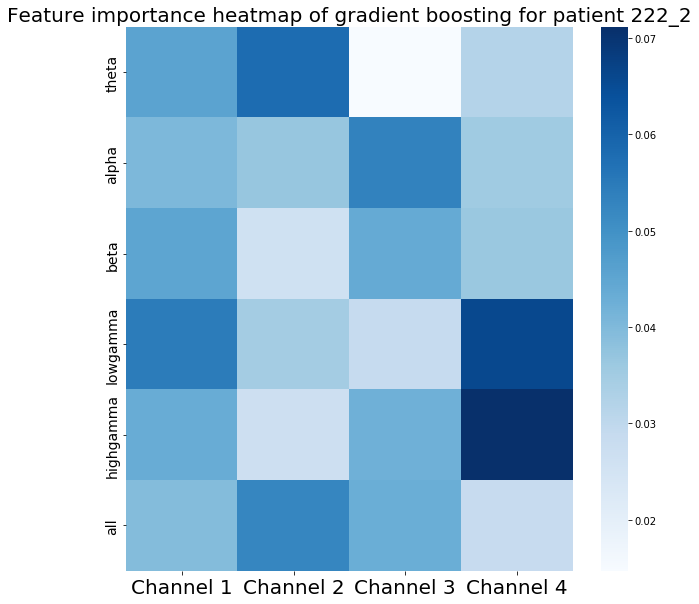

The 3 most important features for gradient boosting are, delta Channel 2 , beta Channel 4 , lowgamma Channel 4 


In [30]:
for pat in pats:
    plot_funcs.feature_importance(pat, 1, if_save = 0)
    plot_funcs.feature_importance(pat, 7, if_save = 0)

## Pairwise features scatter plot

### Each data point corresponds to a .dat file. Red points means it is in a good epoch, and blue points means it is in a bad epoch.

In [7]:
if_remove_sleep = 1
if_remove_icd = 1
p229.features
dlist = ['region_start_time', 'epoch', 'filename', 'if_stimulated', 'id']
if if_remove_sleep:
        dlist.append('sleep')
if if_remove_icd:
    dlist.append('i12')
    dlist.append('i34')
p229.features.drop(dlist, axis = 1, inplace = False)

,delta1,delta2,delta3,delta4,theta1,...,all1,all2,all3,all4,label
1633,680.164478,566.940835,170.649179,662.119967,443.540208,...,1557.786466,4376.096636,709.713597,1878.284017,True
1634,833.779602,651.250164,164.036945,828.162406,568.359164,...,2100.923760,3793.897019,656.189079,1974.650835,True
1635,203.235705,264.172585,105.114985,210.849406,285.520004,...,965.044443,2133.818411,361.454615,982.985999,True
1636,112.641848,110.515245,70.882142,113.874863,246.154818,...,740.347446,580.039480,314.440540,709.004495,True
1637,986.767934,332.538069,143.791948,290.389210,624.991166,...,1954.085657,2637.690746,486.038681,1008.348372,True
...,...,...,...,...,...,...,...,...,...,...,...
2677,177.642733,143.559061,48.646858,143.160476,220.797609,...,659.217927,807.328884,213.962279,902.208270,False
2678,477.594196,250.664274,103.266165,339.598133,342.741162,...,1354.700953,1779.718566,553.264204,1842.304475,False
2679,50.526468,44.701334,17.847229,63.053034,139.097543,...,435.650501,485.924404,123.189334,552.263910,False
2680,113.466139,132.571927,51.642178,134.267417,146.405035,...,454.233730,701.853038,343.960335,1186.022624,False


In [8]:
pd.set_option('display.max_columns', 30)
plot_funcs.get_scatter_plot_data(p231)

Total outliers removed: 21


,delta1,delta2,delta3,delta4,theta1,theta2,theta3,theta4,alpha1,alpha2,alpha3,alpha4,beta1,beta2,beta3,beta4,low_gamma1,low_gamma2,low_gamma3,low_gamma4,high_gamma1,high_gamma2,high_gamma3,high_gamma4,all1,all2,all3,all4,label
647,52.540879,43.652166,169.626561,47.994966,77.653426,73.585284,132.283194,41.393056,76.774523,83.716009,73.781896,24.715429,158.709932,195.014768,132.185618,57.815951,66.921943,84.626163,59.516749,41.280686,25.052553,26.931398,24.740500,22.402387,456.290919,504.995728,590.395180,234.908162,True
648,67.371989,36.895066,99.998346,40.672797,83.025855,49.766390,101.685936,43.323707,52.038473,63.795443,55.284608,19.814494,135.766837,143.574827,103.785208,42.320166,66.032288,64.156730,52.980774,39.005670,25.407701,25.493819,26.304463,22.143664,427.239571,381.793350,438.397733,206.820731,True
649,99.857643,43.743936,131.445025,50.462590,78.433538,52.023979,110.203051,36.999955,64.644898,55.724151,58.688134,19.871226,181.487332,155.427435,121.713626,47.794228,72.383902,61.297536,63.108861,41.514227,27.523998,26.306771,28.865205,22.853450,522.376569,393.975260,512.293985,219.247318,True
650,129.677420,85.919986,104.240635,33.813202,111.814219,114.253805,110.936082,41.216232,105.378780,114.072113,62.648212,27.869914,187.564442,220.525742,115.320875,53.176903,67.959740,67.252669,51.975569,33.809532,25.943668,27.780222,24.305595,19.526904,627.026604,626.899623,468.444107,208.923204,True
651,91.679727,60.534557,157.204467,58.719918,79.233067,64.724569,102.978850,40.099788,50.436315,75.311729,57.604117,19.613029,152.275433,146.887291,119.058054,44.874632,58.494189,54.774480,51.623943,35.571129,25.237187,23.680726,26.080258,21.100966,456.565769,425.212688,514.410648,219.907144,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,104.142656,43.925946,121.402267,44.771501,100.667476,52.816564,128.193040,57.710658,73.100934,80.999027,84.178656,55.898530,180.188003,153.371412,134.589291,76.729897,73.132145,72.736170,66.563743,57.017947,35.054053,30.561880,34.055171,26.327198,565.235824,433.611692,565.892970,318.116432,False
1536,113.162000,50.395396,91.166914,40.079455,89.966879,90.940386,96.887581,31.257395,71.331918,74.857445,60.687237,23.724263,179.689975,199.345068,133.518224,44.251346,69.958346,76.662801,64.934303,39.175853,29.381314,29.061903,31.572590,24.162478,553.015062,520.205682,477.339595,202.079093,False
1537,225.536331,153.708886,189.820605,71.536294,225.670238,264.015213,207.829890,114.269363,205.670618,163.124737,92.963880,126.173273,361.828344,249.855214,162.831969,162.036871,103.103140,99.690895,70.906170,61.020523,43.167140,40.375479,33.251599,28.278869,1164.053593,966.641831,753.566978,560.389747,False
1538,85.753303,34.006378,103.498303,41.858699,113.615081,76.859677,149.850580,64.627288,60.633478,73.064497,64.475270,22.612823,180.194488,178.442120,128.550630,45.130712,70.494224,68.510785,63.167042,39.918934,31.170735,28.318351,34.481422,25.607426,539.689490,458.521869,543.486784,239.335682,False


In [34]:
p231.features_list = ['high_gamma3', "high_gamma4"]
p222_1.features_list = ['beta4', "low_gamma3"]
p222_2.features_list = ['high_gamma2', "beta4"]
p229.features_list = ['high_gamma4', "low_gamma1"]

Total outliers removed: 21


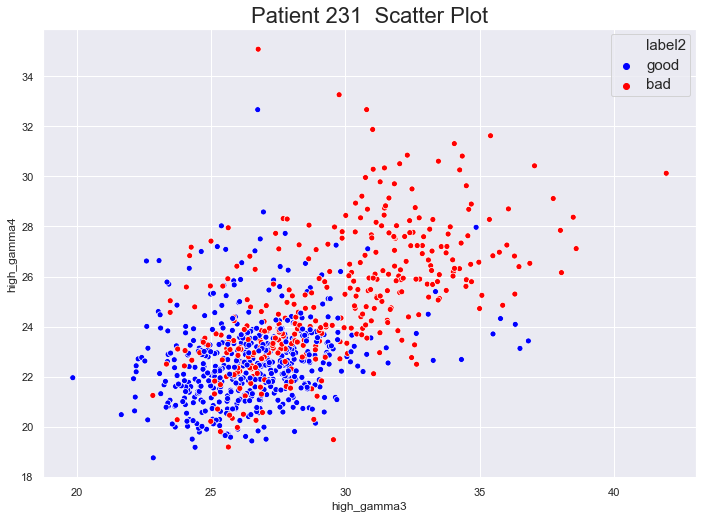

Total outliers removed: 19


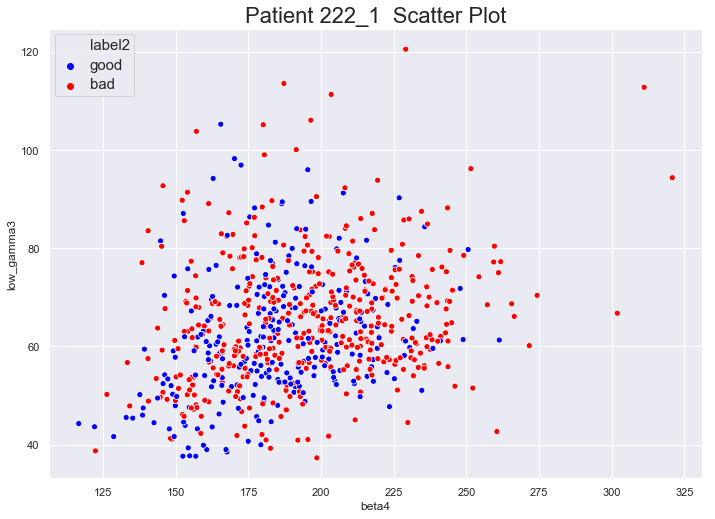

Total outliers removed: 9


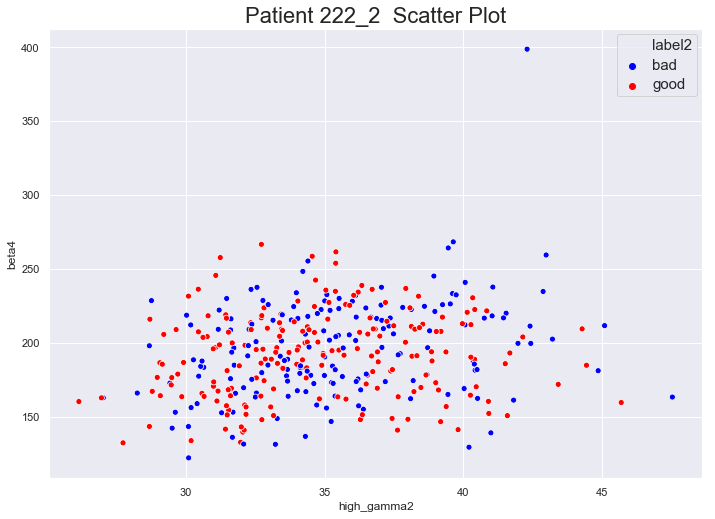

Total outliers removed: 42


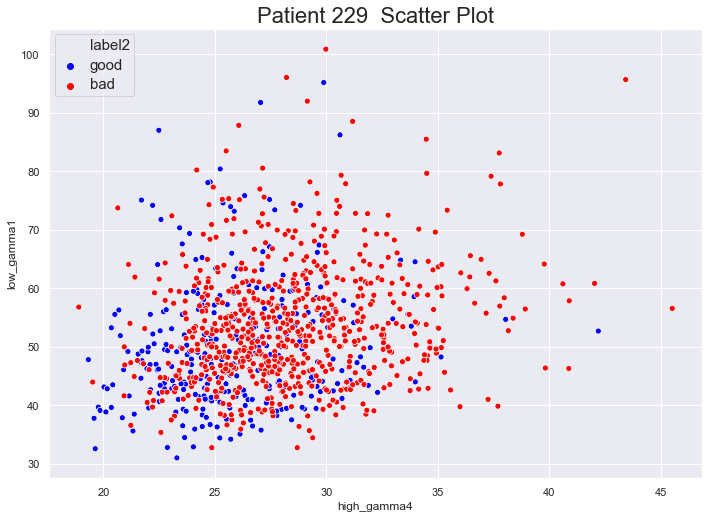

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
for pat in pats:
    data_s = plot_funcs.get_scatter_plot_data(pat)
    data_s.loc[data_s['label'] == True, 'label2'] = 'good'
    data_s.loc[data_s['label'] == False, 'label2'] = 'bad'
    sns.set(font_scale=2)
    colors = ["bright red", "sky"]
    #sns.pairplot(data_ml, hue="label_sti", size = 5, vars=JJ.get_variable_name(features_list), plot_kws={"s": 5},palette=sns.diverging_palette(240, 10, n=4))
    #g = sns.pairplot(data_s, hue="label", size = 8, vars=pat.features_list, plot_kws={"s": 30},palette=sns.xkcd_palette(colors))
    features = pat.features_list
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    g = sns.scatterplot(x = features[0], y = features[1], hue = 'label2', data = data_s,legend = 'brief',palette=['blue','red'])
    #plt.tight_layout(pad=5.2, w_pad=0.2, h_pad=0.5)
    plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    plt.title('Patient {0}  Scatter Plot'.format(pat.id), fontsize=hp.label_fontsize)
    #plt.legend(['bad','good'])
    plt.savefig('../fig/'+ pat.id + '/scatter.png')
    plt.show()

### 3D scatter plot

In [ ]:
%matplotlib notebook

JJ.scatter_plot_3d(data,patid, var_list = plot_3d_var_list)
